<a href="https://colab.research.google.com/github/sgr1118/Kaggle-Transcription/blob/main/Kaggle_Transcription_titanic(220804).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 라이브러리 불러오기
import pandas as pd
pd.set_option('max_rows',200)
pd.set_option('max_columns',12)
path = '/content/drive/MyDrive/Aiffel/fliped/Kaggle-Transcription/titanic'

data = pd.read_csv(path + '/train.csv')
data.head()

# Part1: Exploratory Data Analysis(EDA)

In [ ]:
import numpy as np
import pandas as mp
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
# plt.style.use : matplotlib 스타일시트 설정
import warnings
warnings.filterwarnings('ignore') # 경고메시지
%matplotlib inline

In [ ]:
# 결측치 확인
data.isnull().sum()
# Age : 177개, Cabin : 687개, Embarked : 2개
# DF에서 왜 Series 형태로 출력되는가?
# T : 1, F : 0 이기 때문

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

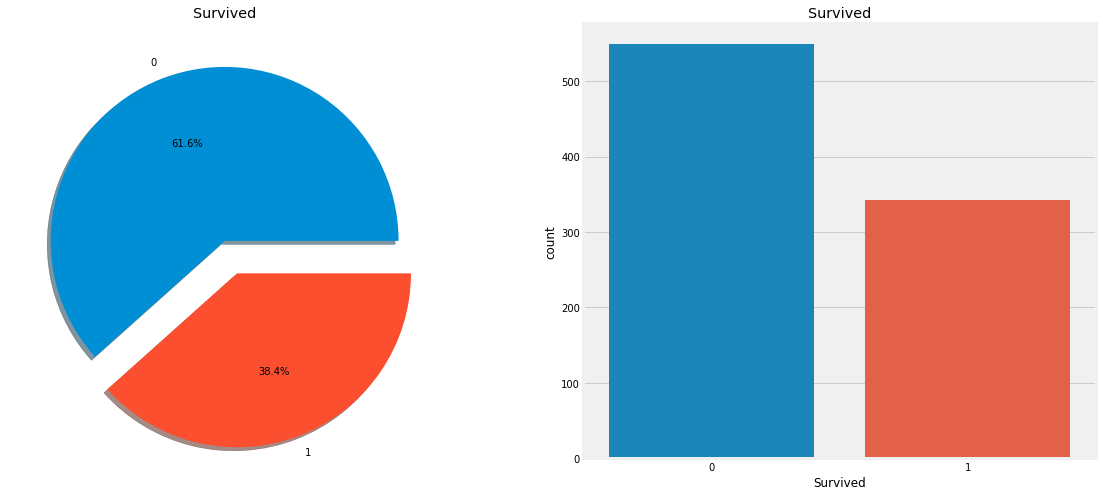

In [ ]:
# 시각화
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0.0,0.2],
                                         autopct='%1.1f%%',ax=ax[0], shadow=True)
# explode : 부채꼴이 파이 차트의 중심에서 벗어나는 정도를 설정
# shadow : True로 설정하면, 파이 차트에 그림자가 표시
# autopct : 부채꼴 안에 표시될 숫자의 형식을 지정
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [ ]:
# Analysing The Features

# Sex > Categorical Frature
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

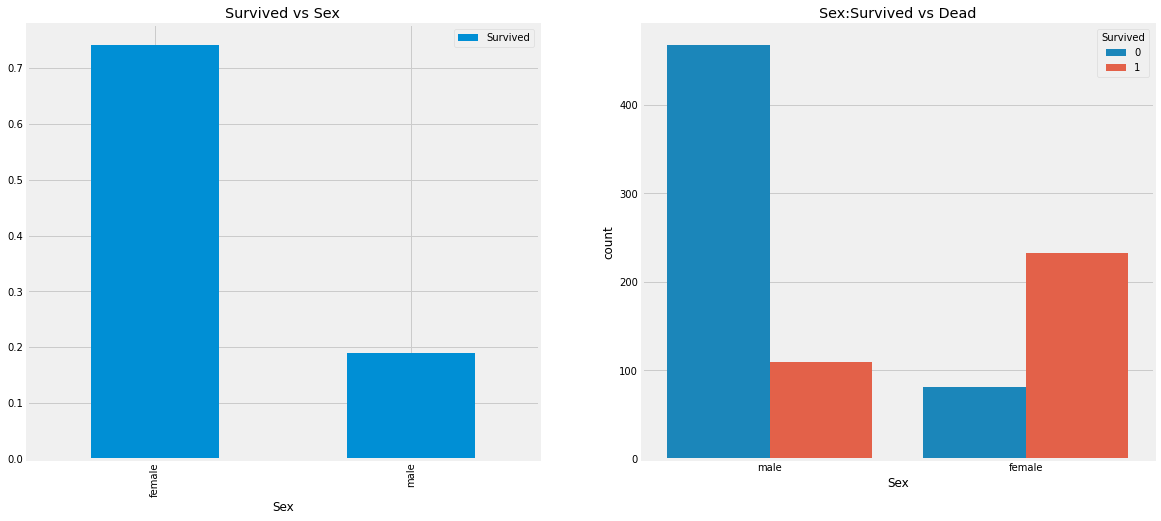

In [ ]:
# 성별 생존 시각화
f,ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()
# 남/녀 간 생종율을 비교한다면 여성이 높고, 생존자 수를 비교한다면 여성이 남성보다 많다.

In [ ]:
# Pclass --> Ordinal Feature
pd.crosstab(data.Pclass,data.Survived,
            margins=True).style.background_gradient(cmap='summer_r')
# style.background_gradient : 수치의 크기를 색상 온도로 보는것


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


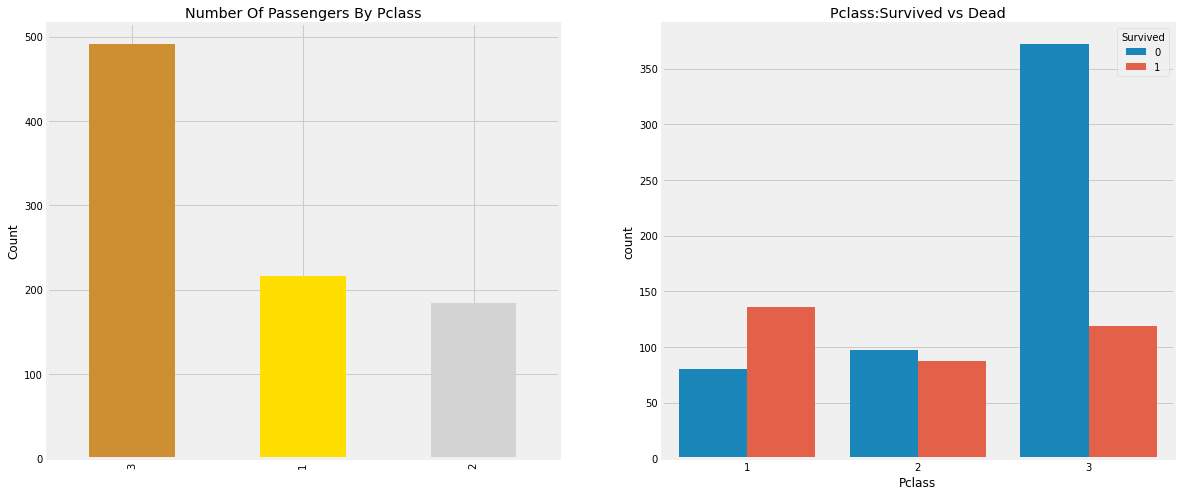

In [ ]:
#
f,ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD8F32', '#FFDF00', '#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [ ]:
# Pclass --> Ordinal Feature
pd.crosstab([data.Sex,data.Survived],data.Pclass,
            margins=True).style.background_gradient(cmap='summer_r')
# [data.Sex,data.Survived],data.Pclass 두 변수를 그룹으로 묶고 Pclass의 수치를 나타냄

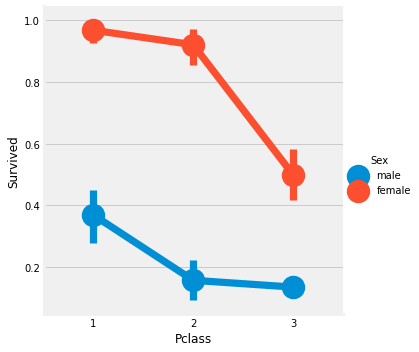

In [ ]:
# class별 남녀의 생존율
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

In [ ]:
# Age--> Continous Feature

print('Oldest Passenger was of:', data['Age'].max(), 'years')
print('Youngest Passenger was of:', data['Age'].min(), 'years')
print('Average Age on the ship:', data['Age'].mean(), 'years')

Oldest Passenger was of: 80.0 years
Youngest Passenger was of: 0.42 years
Average Age on the ship: 29.69911764705882 years


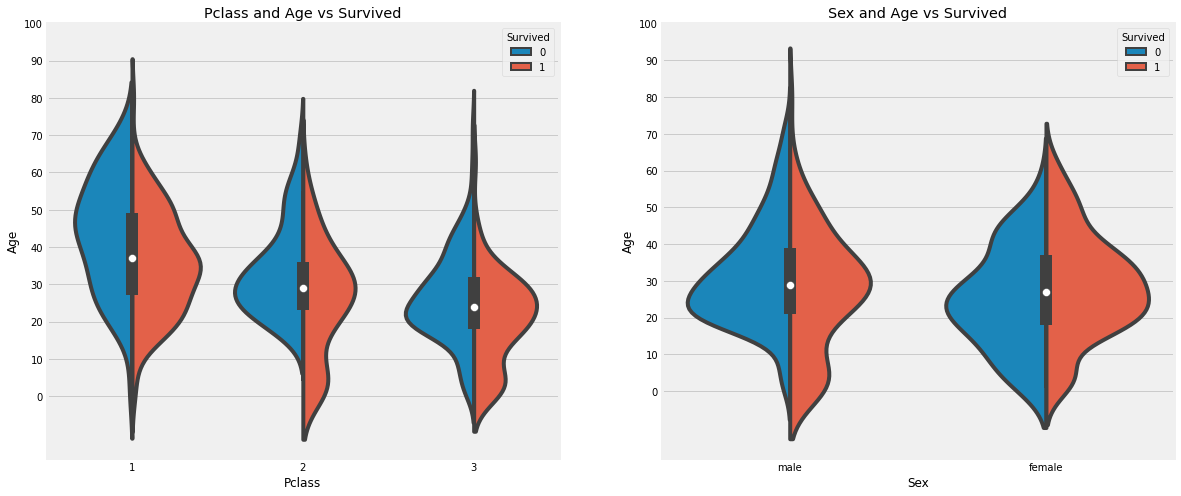

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()


In [ ]:
data['Initial'] = 0
for i in data:
  data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
# str.extract('([A-Za-z]+)\.') : 띄어쓰기로 시작해 모든 알파벳이 포함된 문자열을 한 번이상 반복하다가
# dot(.)으로 마무리하는 문자열

In [ ]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')
# pd.plot.T : 시각화 결과물의 축을 바꿔준다

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
data['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [ ]:
# 값 대체
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [ ]:
# Filling NaN Ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46
# 'Age'가 결측값이면서 해당하는 Initial에 나이를 대입해줘라

In [ ]:
data.Age.isnull().any()
# pd.any() : 요소가 True인지 여부를 반환

False

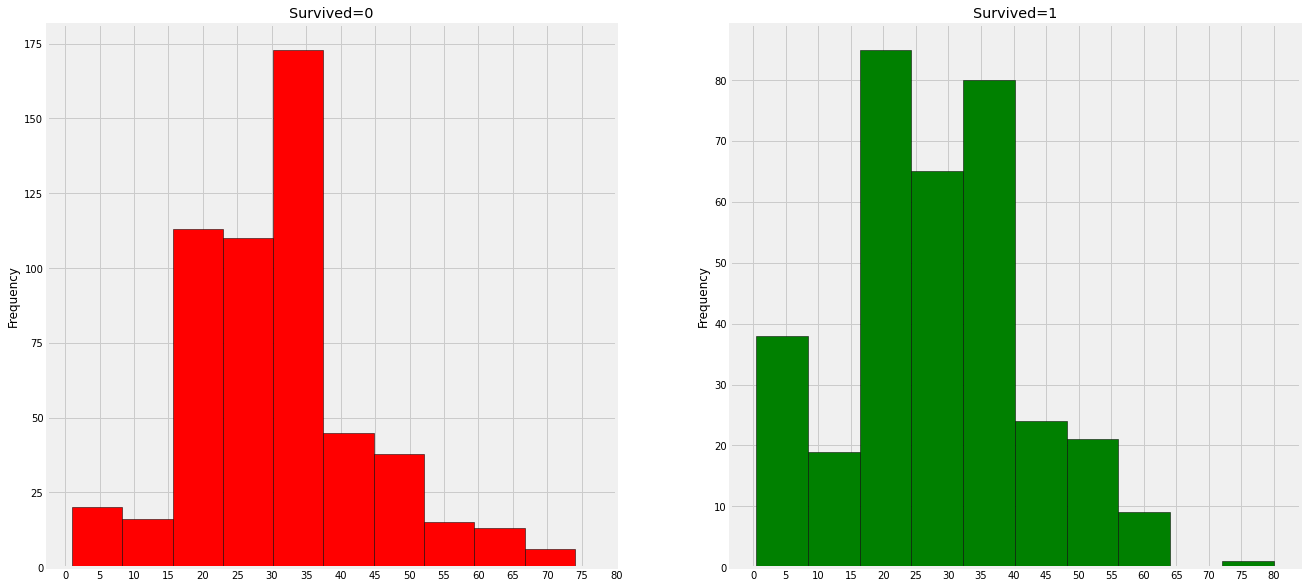

In [ ]:
f,ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=10, edgecolor='black', color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins=10, edgecolor='black', color='green')
ax[1].set_title('Survived=1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()
# hist(bins=) : bins 파라미터는 히스토그램의 가로축 구간의 개수

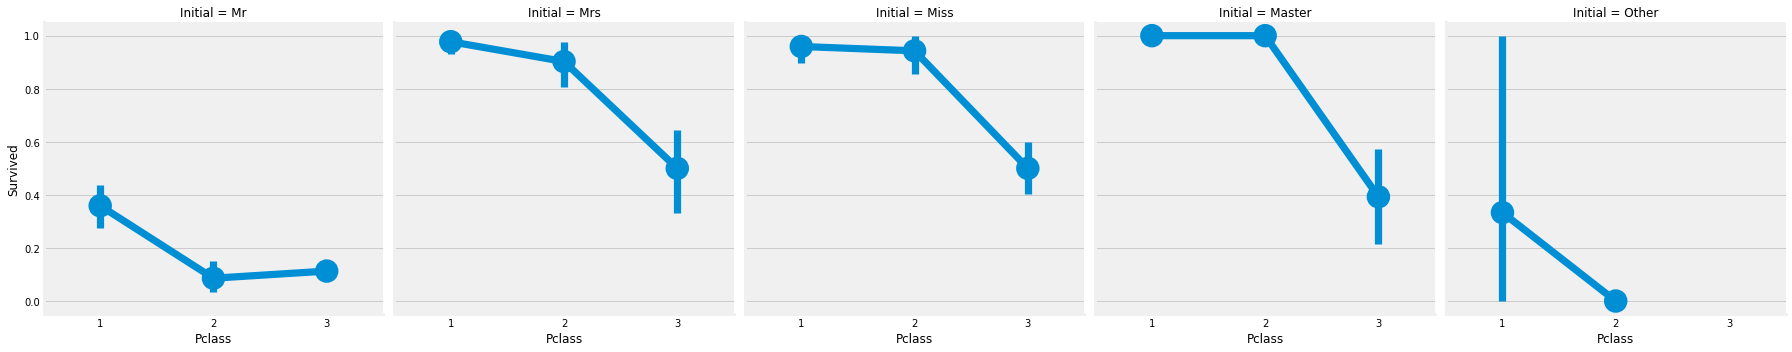

In [ ]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

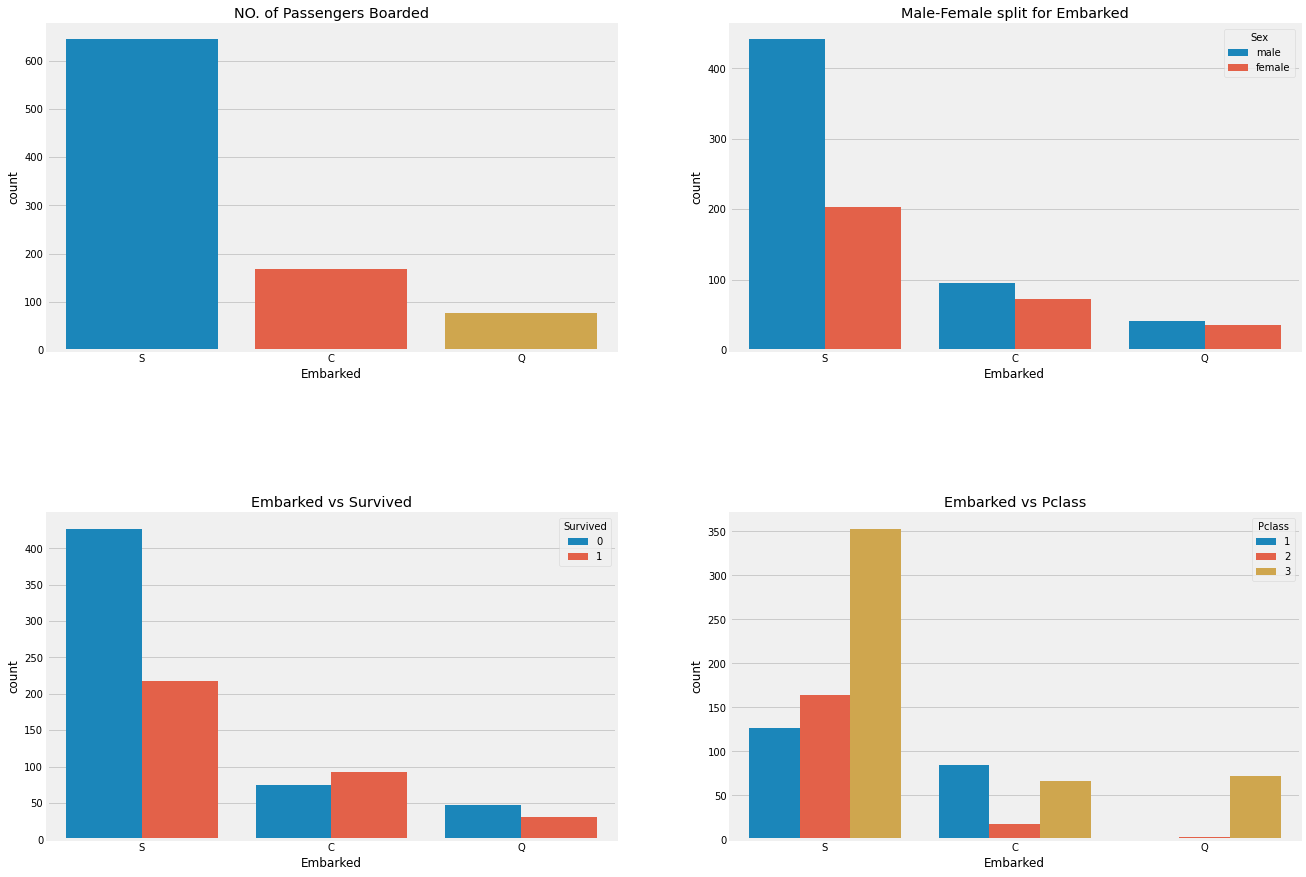

In [ ]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('NO. of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female split for Embarked')
sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()
# wspace, hspace : 가로 세로 간격